# Step-by-step data cleaning and preparation

In this notebook, I'll demonstrate how to clean and prepare a raw dataset. I'll also run some preliminary analysis with the dataset after it has been prepared. From the reader, I assume a basic understanding of `python`-language and its data science libraries, namely `numpy`, `pandas`, `matplotlib` and `seaborn`.

The dataset taken as an example is a collection of information on more than **470,000 artworks** in the The Metropolitan Museum of Art. It is available [here](https://github.com/metmuseum/openaccess).

The steps I take for preparing the data are:

1. Getting familiar with the dataset
2. Choosing columns to keep
3. Resetting the index
4. Converting year-data to real numeric values
5. Using string manipulation methods to clean columns with string-data
6. Checking for and dealing with NaN-values 
7. Preliminary basic analysis

## 1. Getting familiar with the dataset

It's always a good idea to get a general sense of the dataset first, to understand the dimensions and qualities of the data and where the caveats lie.

First things first, let's import the needed libraries (`numpy`, `pandas` for now), read in the the dataset and get a general sense of the data using the `info()`- and `head()`-functions. I also modify the default view setting of Jupyter Notebook, so that I can view longer outputs without truncation.

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 5000

artworks = pd.read_csv("../../Datasets/Data cleaning and preparation/metobjects.csv", sep=',', low_memory=False)
artworks.info()
artworks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474475 entries, 0 to 474474
Data columns (total 51 columns):
Object Number              474475 non-null object
Is Highlight               474475 non-null bool
Is Public Domain           474475 non-null bool
Is Timeline Work           474475 non-null bool
Object ID                  474475 non-null int64
Department                 474475 non-null object
AccessionYear              470342 non-null object
Object Name                472546 non-null object
Title                      444499 non-null object
Culture                    206339 non-null object
Period                     89381 non-null object
Dynasty                    23147 non-null object
Reign                      11175 non-null object
Portfolio                  23183 non-null object
Artist Role                270366 non-null object
Artist Prefix              89253 non-null object
Artist Display Name        272460 non-null object
Artist Display Bio         233228 non-null object
A

,Object Number,Is Highlight,Is Public Domain,Is Timeline Work,Object ID,Department,AccessionYear,Object Name,Title,Culture,...,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL
0,1979.486.1,False,False,False,1,The American Wing,1979,Coin,One-dollar Liberty Head Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN
1,1980.264.5,False,False,False,2,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN
2,67.265.9,False,False,False,3,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN
3,67.265.10,False,False,False,4,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN
4,67.265.11,False,False,False,5,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN


As we can see, the exact shape of the dataset is **474,475 rows** with **51 columns**.

A thing to note is that there seems to be quite a lot of NaN/null-values in many columns. For now, it's enough to note that and be aware that for some columns the NaN-columns make up the majority of values.

## 2. Choosing columns to keep

So, let's say that for the analysis, I only want to keep columns related to the artworks themselves, plus time and country data describing the artworks. One way to subset the data would be to drop the unwanted columns using the drop-function. However, in this case, it would be quite cumbersome since there's way more columns to drop than columns to keep.

Instead, it's simpler just to select the columns we want to keep and assign them back to the 'artworks' dataframe-variable. So let's do that and inspect the new dataset again with the head-function.

In [2]:
artworks = artworks[['Object Number', 
           'Object ID',
           'Department',
           'AccessionYear',
           'Object Name',
           'Title',
           'Object Date',
           'Object Begin Date',
           'Object End Date',
           'Medium',
           'Credit Line',
           'Country',
          ]]

artworks.head()

,Object Number,Object ID,Department,AccessionYear,Object Name,Title,Object Date,Object Begin Date,Object End Date,Medium,Credit Line,Country
0,1979.486.1,1,The American Wing,1979,Coin,One-dollar Liberty Head Coin,1853,1853,1853,Gold,"Gift of Heinz L. Stoppelmann, 1979",NaN
1,1980.264.5,2,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,1901,1901,1901,Gold,"Gift of Heinz L. Stoppelmann, 1980",NaN
2,67.265.9,3,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,1909–27,1909,1927,Gold,"Gift of C. Ruxton Love Jr., 1967",NaN
3,67.265.10,4,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,1909–27,1909,1927,Gold,"Gift of C. Ruxton Love Jr., 1967",NaN
4,67.265.11,5,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,1909–27,1909,1927,Gold,"Gift of C. Ruxton Love Jr., 1967",NaN


Looking good, now we have 12 columns instead of 51. Now we only have the data really needed in our future analysis, which makes further cleaning a lot simpler.

## 3. Resetting the index

Next, I'll do a simple indexing reset which helps in searching for a given row of the data, if we know its unique `Object ID`. This isn't really absolutely *needed*, but it can help in searching for a specific row later.

To understand this, look at the index of the dataset above. One can see values 0, 1, 2... on the far left. This is the standard way of pandas indexing, but one cannot know which default index number corresponds to which piece of artwork. Instead, let's reset the index to include the values from the `Object ID`-column.

First off, let's test that the `Object ID`-column values are truly unique for each row.

In [3]:
artworks['Object ID'].is_unique

True

The above code snippet gives as a boolean value of `True`, which confirms that each ID is actually unique. Next, let's reset the index. Note that to avoid needing to assign the dataframe back to a variable, you can use the `inplace`-parameter and set it to `True`.

In [4]:
artworks.set_index('Object ID', inplace=True)
artworks.head()

,Object Number,Department,AccessionYear,Object Name,Title,Object Date,Object Begin Date,Object End Date,Medium,Credit Line,Country
Object ID,,,,,,,,,,,
1,1979.486.1,The American Wing,1979,Coin,One-dollar Liberty Head Coin,1853,1853,1853,Gold,"Gift of Heinz L. Stoppelmann, 1979",NaN
2,1980.264.5,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,1901,1901,1901,Gold,"Gift of Heinz L. Stoppelmann, 1980",NaN
3,67.265.9,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,1909–27,1909,1927,Gold,"Gift of C. Ruxton Love Jr., 1967",NaN
4,67.265.10,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,1909–27,1909,1927,Gold,"Gift of C. Ruxton Love Jr., 1967",NaN
5,67.265.11,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,1909–27,1909,1927,Gold,"Gift of C. Ruxton Love Jr., 1967",NaN


And it seems like our index was reset successfully.

## 4. Converting year-data to real numeric values

Next up, let's make sure that the columns containing year values really have numeric values in them. This will help us down the road when doing some calculations with the years.

In [5]:
print(artworks['AccessionYear'].dtype)
print(artworks['Object Date'].dtype)
print(artworks['Object Begin Date'].dtype)
print(artworks['Object End Date'].dtype)

object
object
int64
int64


It seems that `Object Begin Date`and `Object End Date` are clean with only integer-values in them. However, the two other columns have mixed data types at best, since the dtype is declared as `object`, which roughly corresponds to `str`-type in vanilla python. 

When taking a closer look, it seems that `Object Date`-column is a descriptive column indicating the era of the artwork in string format, and the numeric values have been implemented to the two columns next to it (`Object Begin Date`and `Object End Date`). Thus, we don't need to modify this column further, as we can use the two other columns for any calculations. However, let's see what kind of values we can find from `AccessionYear`.

In [6]:
artworks['AccessionYear'].value_counts()

1963          41051
2011          18618
1917          12322
1994          10594
2009           9386
1936           9089
1926           7307
1953           7023
1941           6702
1923           6618
1959           6218
1951           5968
1910           5658
1920           5642
1975           5548
1930           5491
1914           5408
1874           5393
2005           5295
1949           5231
1948           5211
1979           5107
1929           4987
1909           4947
1908           4906
1946           4829
1933           4816
1978           4738
1962           4546
1922           4463
1957           4456
1943           4440
1924           4277
1964           4215
1967           4148
1889           3999
1925           3906
1950           3810
1932           3705
1970           3690
1960           3618
1984           3467
1986           3466
1907           3452
1921           3397
1927           3371
1999           3332
1987           3329
1981           3325
1942           3150


It seems there are two dates which keep this column from being completely numeric (`2005-02-15` and `2020-03-23`). We only need the year values for these two rows, not the full dates. Since there are only two cases here, we could easily extract the years manually, but let's use a more generic approach to highlight how we could do it for a large number of rows as well.

We can use a regular expression to extract only a four-digit year-value from the all of the columns values and discard everything else. Then, we'll assign the values back to the column and convert it to numeric.

In [7]:
regex = r'^(\d{4})'
col_extract_1 = artworks['AccessionYear'].str.extract(regex, expand=False)
artworks['AccessionYear'] = pd.to_numeric(col_extract_1)
artworks['AccessionYear'].value_counts()

1963.0    41051
2011.0    18618
1917.0    12322
1994.0    10594
2009.0     9386
1936.0     9089
1926.0     7307
1953.0     7023
1941.0     6702
1923.0     6618
1959.0     6218
1951.0     5968
1910.0     5658
1920.0     5642
1975.0     5548
1930.0     5491
1914.0     5408
1874.0     5393
2005.0     5296
1949.0     5231
1948.0     5211
1979.0     5107
1929.0     4987
1909.0     4947
1908.0     4906
1946.0     4829
1933.0     4816
1978.0     4738
1962.0     4546
1922.0     4463
1957.0     4456
1943.0     4440
1924.0     4277
1964.0     4215
1967.0     4148
1889.0     3999
1925.0     3906
1950.0     3810
1932.0     3705
1970.0     3690
1960.0     3618
1984.0     3467
1986.0     3466
1907.0     3452
1921.0     3397
1927.0     3371
1999.0     3332
1987.0     3329
1981.0     3325
1942.0     3150
1966.0     3073
1954.0     3049
1952.0     3014
2012.0     2981
1958.0     2962
1985.0     2928
2018.0     2920
2002.0     2916
1911.0     2818
1896.0     2788
1977.0     2780
1974.0     2775
1972.0  

And now all of our needed year-columns are in truly numeric form.

## 5. Using string manipulation methods to clean columns with string-data

Let's inspect the country column and its values.

In [8]:
artworks['Country'].value_counts()

Egypt                                                                          31114
United States                                                                   8853
Iran                                                                            6146
Peru                                                                            3395
France                                                                          1700
Byzantine Egypt                                                                 1673
Mexico                                                                          1534
Indonesia                                                                       1439
India                                                                           1279
England                                                                         1114
China                                                                            917
Turkey                                                           

We can easily see that there's a vast number of different ways that the countries have been assigned to the `Country`-column. Furthermore, on many rows there's unwanted "dirt" present, such as question-marks, additional words (possibly, probably, present-day) and so forth. This calls for cleaning of the `Country`-column values.

For this example, we will do the following operations:

* Simplify the categorizations by eliminating excess country assigments
    * If there is a separator `|`, eliminate it and all strings coming after it.
    * If there is a separator `,`, eliminate it and all strings coming after it.
    * If there is a separator `or`, eliminate it and all strings coming after it.
* Simplify the categorizations by eliminating any strings in brackets `()`
* Eliminate excess question marks in all their different forms: `?`, `(?)`, `?)`...
* Eliminate excess words, such as `probably`, `possibly`, `present-day` in all their forms.
* Eliminate extra descriptive words for a specific era, such as `Byzantine`.
* Change all the country titles to title-case, e.g. so that "iran" becomes "Iran".

Please note that due to eliminating the strings after the first string we might be losing some data, but in this simple example we'll not raise an issue out of it.

I will use regex extensively to complete this tasks. I will not go into the details of how to form the regex-patterns, there's plenty of course material online to cover it. The basic idea is to use str.replace to first find matches for the situations we described above and then replace them with empty strings, i.e. eliminating the excess strings.

After the operations are done, let's inspect the number of different values again. 

In [9]:
artworks['Country'] = artworks['Country'].str.split(pat="|").str.get(0)
artworks['Country'] = artworks['Country'].str.replace(r"\s?\(.*?\)", "", regex=True)
artworks['Country'] = artworks['Country'].str.replace(r",.*$", "", regex=True)
artworks['Country'] = artworks['Country'].str.replace(r";.*$", "", regex=True)
artworks['Country'] = artworks['Country'].str.replace(r":.*$", "", regex=True)
artworks['Country'] = artworks['Country'].str.replace(r"\s?\(?\?\)?", "", regex=True)
artworks['Country'] = artworks['Country'].str.replace(r"\sor\s?\w+\??", "", regex=True)
artworks['Country'] = artworks['Country'].str.replace(r"\(?\s?[pP]robably\)?\s?", "", regex=True)
artworks['Country'] = artworks['Country'].str.replace(r"\(?\s?[pP]ossibly\)?\s?", "", regex=True)
artworks['Country'] = artworks['Country'].str.replace(r"\(?\s?[pP]resent-day\)?\s?", "", regex=True)
artworks['Country'] = artworks['Country'].str.replace("Byzantine ", "", regex=True)
artworks['Country'] = artworks['Country'].str.title()
artworks['Country'].value_counts()

Egypt                                 33269
United States                          9326
Iran                                   6549
Peru                                   3431
France                                 1976
Mexico                                 1559
Indonesia                              1441
India                                  1346
England                                1255
China                                   945
Turkey                                  932
Germany                                 925
Papua New Guinea                        882
Nigeria                                 656
Italy                                   553
Syria                                   543
Democratic Republic Of The Congo        510
Spain                                   437
Iraq                                    434
Canada                                  393
Mali                                    385
Colombia                                368
Côte D'Ivoire                   

As you can see, we have consolidated a lot of the values. For example, `Egypt` has +2155 more values, `United States` has +469, `Iran` +402 etc. 

Don't get me wrong, there would be **a lot** to still do in this column as there are many odd values left. Nevertheless, for the purposes of this example it is clear that we have already improved the situation drastically by simple string manipulation operations and using regex. Ideally, we could continue cleaning up this column until we only have one row per a real country left.

## 6. Checking for and dealing with NaN-values 

For the remaining columns, let's check how much NaN-values there are left to deal with. We can get an overview quite conveniently by plotting a heatmap. Let's import `pyplot` and `seaborn`-libraries, set some color configs and then draw the heatmap.

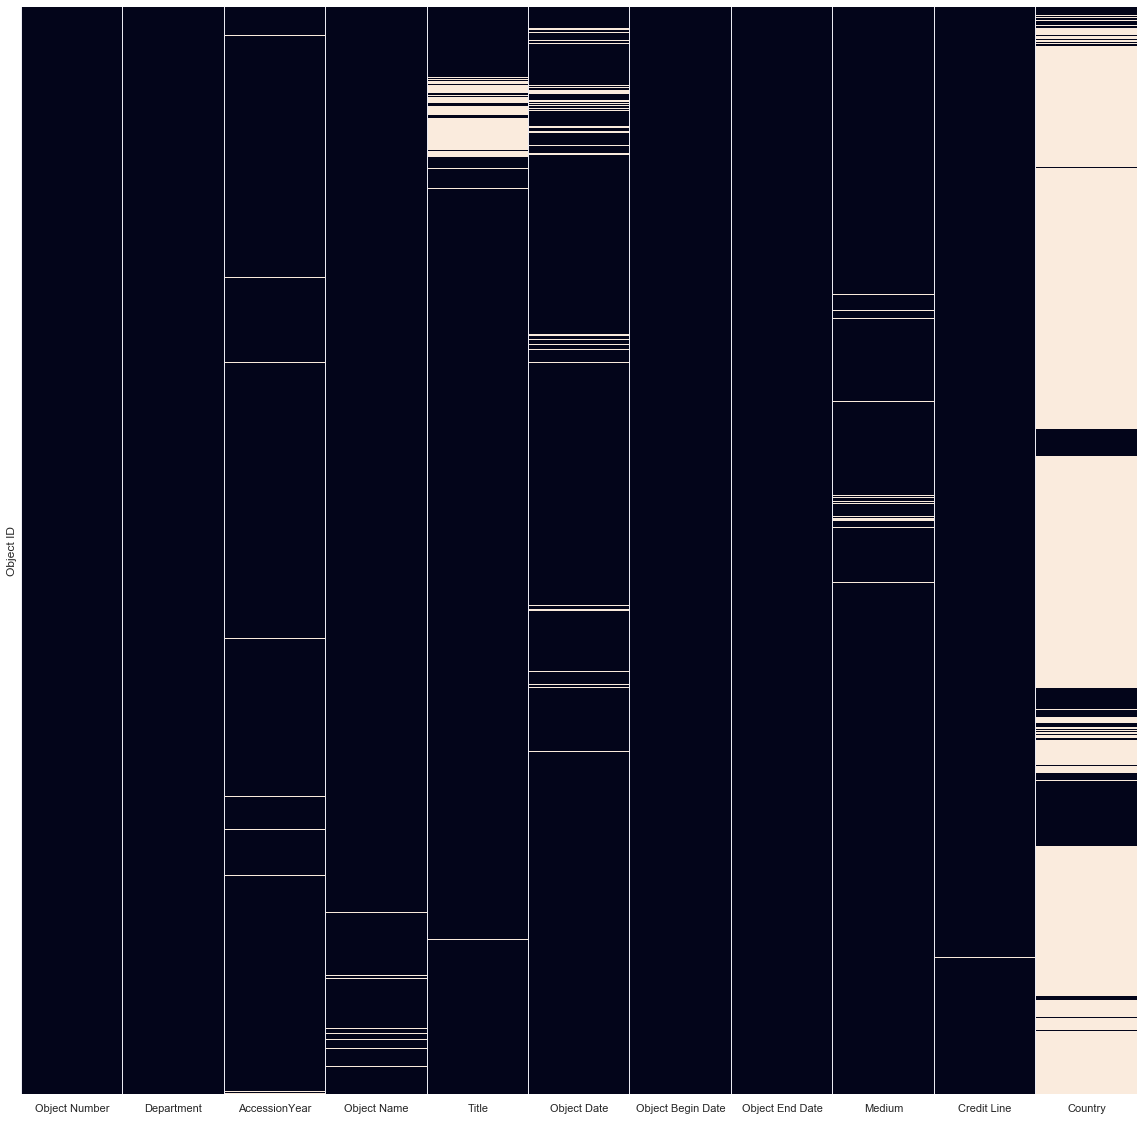

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_palette("muted")

plt.figure(figsize=(20,20))
artworks_null = artworks.isnull()
sns.heatmap(artworks_null, cbar=False, yticklabels=False)
plt.show()

It seems that the most NaN-values can be found from the `Country`-column. Also the `Dimensions`-column, `Classification`-column and `Title`-column include some NaN-values. For other columns, there are some singular NaN-values to be seen.

Basically there are two basic methods to deal with missing data. Eliminating it, or imputating the cells with new data. In this case, we could easily eliminate the rows missing the year data, because we'd be losing a tiny fraction of the total data. Thus the effect on the analysis would be quite small. Another method would be imputating, i.e. calculating for example the mean of all the years and feeding this mean-value to the cells with NaN-values.

For the `Country`-column, the situation is more difficult. Eliminating empty rows would eliminate the majority of data. On the other hand, it's not clear how we could imputate data to the cells, as the values are country names and not numeric data. However, one thing we could do is to imputate the value "Unknown" to the rows with now missing values.

For now, let's see how we could drop some of the rows including NaN-values, and imputate the string "Unknown" to the `Country`-column NaN-values. Let's use the dropna and fillna-methods for these purposes.

After all of this, let's draw the heatmap again to see whether there are any NaN-values left.

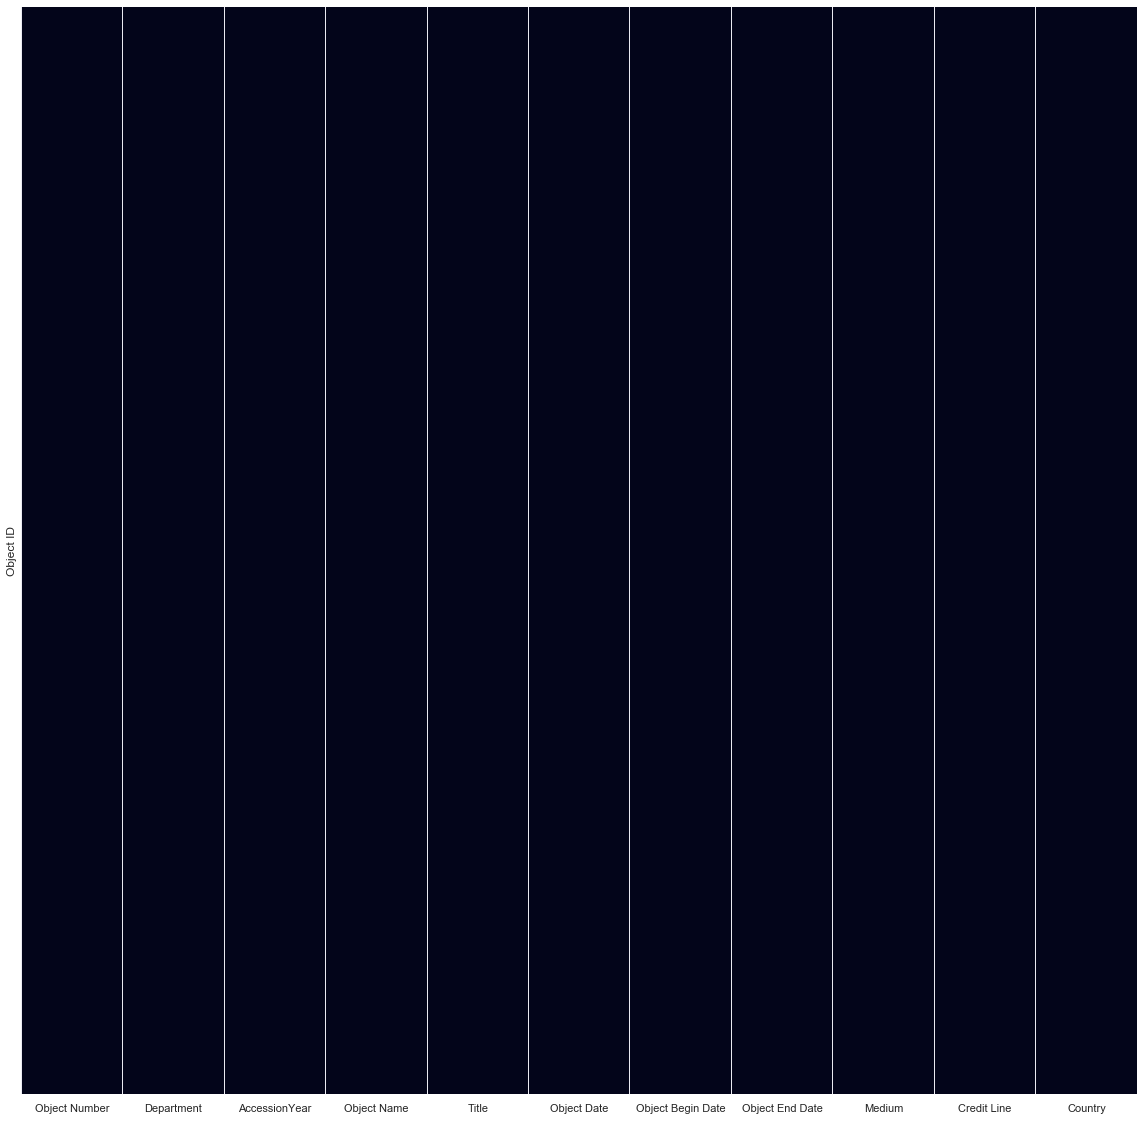

In [11]:
artworks.dropna(subset=['AccessionYear', 'Object Name', 'Object Date', 'Medium', 'Title'], inplace=True)

fill_this = {'Country': 'Unknown'}
artworks.fillna(value=fill_this, inplace=True)

plt.figure(figsize=(20,20))
artworks_null = artworks.isnull()
sns.heatmap(artworks_null, cbar=False, yticklabels=False)
plt.show()

Great! We have no NaN-values left.

## 7. Preliminary basic analysis

It's time to pat ourselves on the back! We have taken a messy dataset, selected some columns for analysis, reset the index, converted year-strings to numeric values, cleaned up country-data and gotten rid of NaN-values.

The dataset is clean and crisp, and ready for some basic analysis.

For example, we could plot out a histogram classifying the artworks by duration of work, i.e. how long did it take for the artist to complete his piece. In the example below we'll concentrate on the pieces which are labelled to have taken under 40 years.

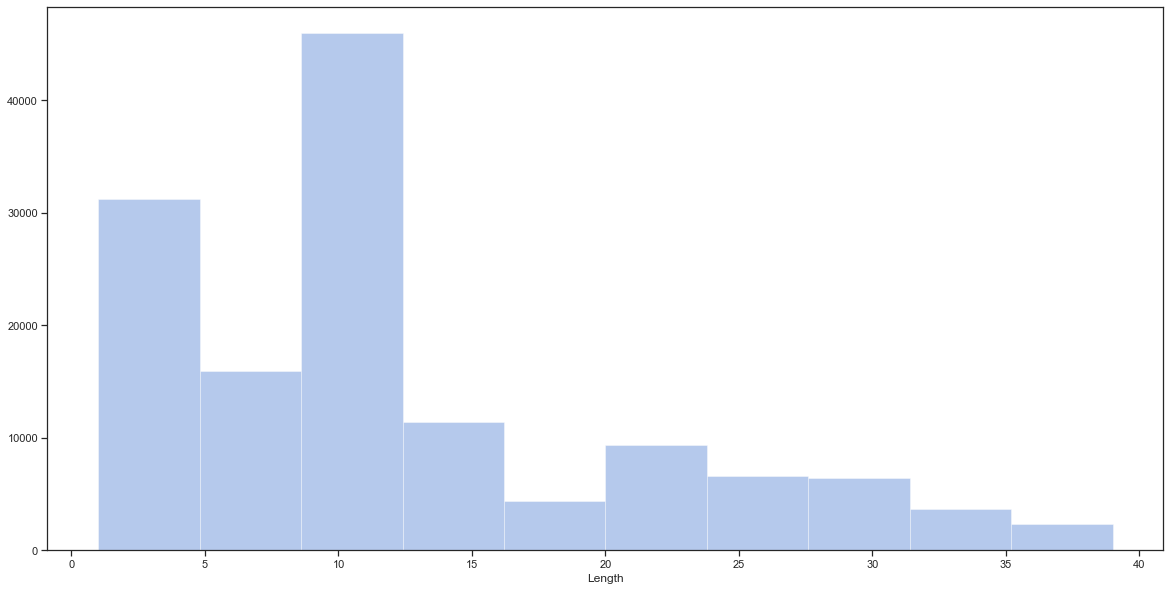

In [12]:
artworks['Length'] = artworks['Object End Date'] - artworks['Object Begin Date']
lengthmask = (artworks['Length'] > 0) & (artworks['Length'] < 40)
artworks_length = artworks[lengthmask]
sns.set_style("ticks")
plt.figure(figsize=(20,10))
sns.distplot(artworks_length['Length'], bins=10, kde=False)
plt.show()

As we can see, a vast majority of artworks took 10 years or less to conceive.

Another example could include analyzing the accession year for the top five countries having the most artworks. 

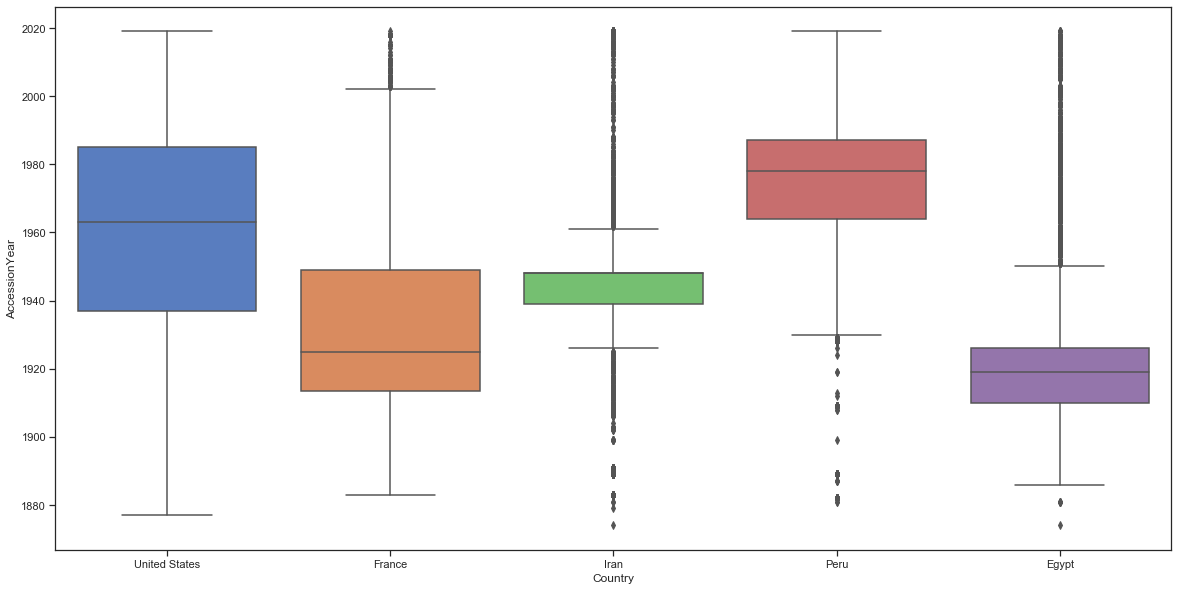

In [13]:
countrymask = (artworks['Country'] == 'Egypt') | (artworks['Country'] == 'United States') | (artworks['Country'] == 'Iran') | (artworks['Country'] == 'Peru') | (artworks['Country'] == 'France')
artworks_country = artworks[countrymask]
plt.figure(figsize=(20,10))
sns.boxplot(x='Country', y='AccessionYear', data=artworks_country)
plt.show()

As can be seen, majority of artworks from Egypt have already been accessed during the early 20th century. However, there's a significant amount of outliers suggesting that there has been a constant stream of further pieces coming in until the very modern days of the 21st century. In contrast, the vast majority of U.S. pieces have an accession year between 1940 and 1980.

But this is just the start of the analysis! I won't be going further in this notebook, since the emphasis here was more on data cleaning and preparation. 

# Summary

In this notebook, I demonstrated some of the most common methods one can apply when cleaning a dataset. We began with a raw dataset and ended up with a coherent and clean table ready to be analyzed.